```
Instituto Federal do Norte de Minas Gerais - Campus Salinas
Bacharelado em Sistemas de Informação
Disciplina: Tópicos Especiais em Computação I
Professora: Patrícia Lucas
Alunas: Adriana de Oliveira Barros, Janina Barbosa de Aguilar e Leidiane Teixeira dos Reis
```

# Atividade 4

**Objetivo**: desenvolver e praticar o algoritmo MLP (Multi Layer Perceptron) em um problema de classificação, bem como todas as técnica que envolvem o aprendizado de máquina vistas até o momento.

**Problema**: utilize o dataset disponível no site Kaggle (clique aqui) e aplique o MLP para verificar se  ́e possível definir, com base nos dados apresentados, se uma pessoa está com a doença de Parkinson.

##**Análise de dados**

**Importação e carregamento de dados**


---




In [ ]:
#Bibliotecas
from google.colab import files
import io
import pandas as pd

In [ ]:
#Importando conjunto de dados
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

Saving pd_speech_features1.csv to pd_speech_features1.csv


**Visualização dos dados**


---

In [ ]:
data.head(3)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,2.00000,0.05883,517.0,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18995.0,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1173.00000,0.26512,0.083127,...,0.071728,0.010352,-2.73030,6.650070e+01,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2155.0000,2.9457,2.1993,1983.0000,1.8314,2.0062,1.6058,1.5466,1562.0000,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,502.0,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21497.0,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,...,0.729330,0.780410,5.22940,8.643986e+06,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2047.0000,1.5772,1553.0000,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45178.0000,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,897.0,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17651.0,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,...,0.269510,-0.005522,0.35054,2.927170e+01,32.4971,38.9453,85148.0000,62.5132,9.7308,6889.0000,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1


In [ ]:
#Dimensões
data.shape

(756, 755)

A base de dados contém 756 linhas e 755 colunas.

**Verificação de dados ausentes e duplicados**


---



In [ ]:
#Remove colunas duplicadas se existirem
data = data.loc[:,~data.columns.duplicated()]

In [ ]:
#remove dados ausentes se existirem
data.dropna(inplace = True)

In [ ]:
data.shape

(756, 755)

A base de dados não possui datos ausentes e duplicados

**Resumo dos dados**


---



In [ ]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,6.477320,10.788200,4.140165,323.972222,322.678571,0.006360,0.000383,0.038003,1.673391e-05,0.001926,0.007766,0.004458,0.907902,555.700241,0.240518,0.201068,0.400259,1.149697,0.961508,0.118524,17218.536918,70.828609,76.135371,73.997008,647.174519,1233.852088,5.500817e+03,3547.259244,213.363237,297.174077,1503.957463,506.604856,2.344780,1956.200689,363.446019,62.920824,2.160181,1.175547,...,-22.268268,-16.167437,-7.318027,1.434752e+05,5.049594e+04,4.796108e+04,2.331095e+04,3.905103e+04,1.570366e+04,2779.135448,620.820585,757.566137,740.803302,1551.623888,690.541830,369.622722,316.724956,326.297468,324.896793,279.699285,244.404551,298.273314,218.122180,186.051256,178.702182,194.560685,177.050250,279.832097,953.430192,1366.993554,2299.954644,2061.611694,1831.207316,1356.076089,1256.246167,1311.857620,1688.508766,1602.401737,3442.949825,0.746032
std,72.793721,0.500079,66.637776,83.314468,47.022269,99.219059,99.402499,0.001826,0.000728,0.669008,2.290134e-05,0.036361,0.108923,0.072733,8.519212,405.320191,2.448282,1.876404,4.914508,12.804802,0.064095,1.855941,7545.379907,8.858268,6.446451,7.018006,134.957916,169.090402,8.078104e+04,347.864299,306.976045,450.125488,26609.651642,658.326606,30.369201,10230.676384,2359.835831,266.027940,21.375733,13.048952,...,369.881538,468.096280,1320.334854,1.439133e+06,6.158557e+05,4.999775e+05,3.672092e+05,4.177932e+05,2.479505e+05,21784.710530,3649.098689,4617.243793,4025.701618,25172.284010,3203.672254,1177.699748,1003.543116,1021.096642,1155.896386,854.485228,790.656020,883.968309,682.880430,664.927128,641.506257,641.629954,604.484841,1457.223736,9792.560004,832

A partir da média das variáveis podemos verificar que os dados se encontram em intervalor bem variados.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


A base de dados é toda numérica, contendo 749 atributos do tipo float e 6 no tipo int.

**Distribuição de dados entre as classes**


---



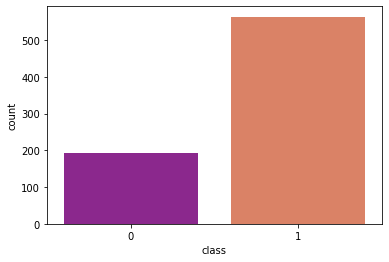

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

sns.countplot(data=data,x = 'class',palette='plasma')

A partir da visualização da distribuição dos dados de saída (target), percebe-se que os dados estão debalanceados, ou seja, a quantidade de dados da classe 1 é o dobro da classe 0.

###**Pré-processamento**

**Normalização**


---


MinMaxScaler

In [ ]:
#Normalização MimMax
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_n = min_max_scaler.fit_transform(data)

**Definição das entradas e saídas**


---



In [ ]:
#Entradas e saídas
X = data_n[:, :(data_n.shape[1]-1)]   
y = data_n[:, data_n.shape[1]-1:]

print("Definição das entradas de saídas ")
print(f"Entradas:{X.shape[1]}\nSaídas: {y.shape[1]}\n")

Definição das entradas de saídas 
Entradas:754
Saídas: 1



**Balanceamento**


---



Smote – Consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos.

https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

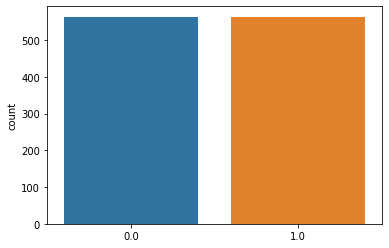

In [ ]:
# Desativando os avisos sobre as bibliotecas depreciadas:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
import seaborn as sns

smt = SMOTE()

X, y = smt.fit_sample(X, y)



#sns.countplot(data=data,x=y,palette='plasma')
ax = sns.countplot(x=y)
#y.shape

In [ ]:
print('---------------- Entradas e saídas pós-balanceamento-------------------')
print(f'Entradas: {X.shape[0]}')
print(f'Saídas:  {y.shape[0]}')

---------------- Entradas e saídas pós-balanceamento-------------------
Entradas: 1128
Saídas:  1128


**Redução de dimensionalidade**



In [ ]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=100)
#train_x=pca.fit_transform(train_x)
#test_x=pca.transform(test_x)

#train_x.shape

**Divisão do conjunto em treinamento e teste**


---



In [ ]:
#Separação dos dados em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25) 

print('Conjuntos de treinamento e teste separados!')
print(f'São {train_x.shape[0]} amostras para o treinamento e {test_x.shape[0]} para teste.')

Conjuntos de treinamento e teste separados!
São 846 amostras para o treinamento e 282 para teste.


###**Treinamento**

**Avaliação e seleção de modelos**


---
Serão testadas diferentes quantidades de neurônios  utilizando a validação cruzada - método k-fold para seleção do melhor modelo


In [ ]:
#Bibliotecas
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings("ignore") # ignorando warnings da MLP

#Definição do número de neurônios e camadas ocultas a serem testadas
neurons = [(377),(188),(94),(47), (23),(11)]  #Dividi a média por 2
actv_funcs = ['logistic']#, 'tanh']

hp = []
val_scores = []

#Preparação do procedimento de validação cruzada
cv = KFold(n_splits=5)

print('AC.VAL.  | TOPOLOGIA ')

# loop de otimização
for neurons in neurons: 
  for actv_func in actv_funcs:
    model = MLPClassifier(neurons,activation=actv_func, max_iter=1000, alpha=0.01,
                        solver='sgd', learning_rate_init=0.1, momentum=0.9, learning_rate='adaptive', 
                        random_state=32, verbose=0)
  
    vs = cross_val_score(model, train_x, train_y, cv=cv) #validação kfld
        
        
    val_acc = np.mean(vs) #média dos valores kfold
    val_scores.append(val_acc)
      
    hp.append([neurons,actv_func])
    print('{:.4}      {}'.format(val_acc,[neurons,actv_func]))


print('\n\n------------------ RESULTADO -------------------------------')

best_i = np.argmax(val_scores)                                                                                                                                                                                                                                                                                                                          
print('\nMelhor modelo: ', best_i, hp[best_i])
print('Acurácia do Conjunto de Validação: {:.4}%'.format(val_scores[best_i]*100))

AC.VAL.  | TOPOLOGIA 
0.8546      [377, 'logistic']
0.8523      [188, 'logistic']
0.8546      [94, 'logistic']
0.8499      [47, 'logistic']
0.8511      [23, 'logistic']
0.8594      [11, 'logistic']


------------------ RESULTADO -------------------------------

Melhor modelo:  5 [11, 'logistic']
Acurácia do Conjunto de Validação: 85.94%


**Confirmação da Acurácia**

Treinamento do modelo por 30 vezes gerando uma nova organização de dados a cada iteração

In [ ]:
#listas para armazenamento das acurácias
acc_train = []
acc_test = []

for c in range(1,30):
  train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25) 

  model = MLPClassifier(hp[best_i][0],activation=hp[best_i][1], max_iter=1000, alpha=0.1,
                      solver='sgd', learning_rate_init=0.1, momentum=0.9, learning_rate='adaptive', random_state=32, verbose=0 )
      
  model = model.fit(train_x, train_y)

  #Avaliação conjunto de treinamento
  train_y_pred = model.predict(train_x)
  acc_train.append(accuracy_score(train_y, train_y_pred))

  #Avaliação Conjunto de Teste
  test_y_pred = model.predict(test_x)
  acc_test.append(accuracy_score(test_y, test_y_pred))

print('Treinamento Finalizado!')

Treinamento Finalizado!


In [ ]:
print('----------------- ANÁLISE DO CONJUNTO DE TREINAMENTO -----------------------\n')
acc_train_mean = np.mean(acc_train)
acc_std = np.std(acc_train)
print('Acurácia no Conjunto de Treinamento: {:.4}%\n'.format(acc_train_mean*100))
print('Desvio Padrão do Conjunto de Treinamento: {:.5}\n'.format(acc_std))


print('\n----------------- ANÁLISE DO CONJUNTO DE TESTE ----------------------------\n')

acc_test_mean = np.mean(acc_test)
acc_std_test = np.std(acc_test)
print('Acurácia no Conjunto de Teste: {:.4}%\n'.format(acc_test_mean*100))
print('Desvio Padrão do Conjunto de Teste: {:.8}\n'.format(acc_std_test))

----------------- ANÁLISE DO CONJUNTO DE TREINAMENTO -----------------------

Acurácia no Conjunto de Treinamento: 98.08%

Desvio Padrão do Conjunto de Treinamento: 0.0061432


----------------- ANÁLISE DO CONJUNTO DE TESTE ----------------------------

Acurácia no Conjunto de Teste: 87.08%

Desvio Padrão do Conjunto de Teste: 0.01970177



**Avaliação do modelo**

----------------- ANÁLISE DO CONJUNTO DE TREINAMENTO -----------------------

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       415
         1.0       0.98      0.97      0.97       431

    accuracy                           0.97       846
   macro avg       0.97      0.97      0.97       846
weighted avg       0.97      0.97      0.97       846

[[405  10]
 [ 14 417]]


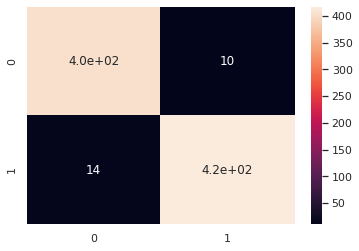

In [ ]:
#Avaliação do modelo
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('----------------- ANÁLISE DO CONJUNTO DE TREINAMENTO -----------------------\n')

train_y_pred = model.predict(train_x)
print(classification_report(train_y, train_y_pred)) # mostra relatório
acc_train = accuracy_score(train_y, train_y_pred)
#acc_std = np.std(acc_train)
#print('Acurácia no Conjunto de Treinamento: {:.4}%\n'.format(acc_train*100))
#print('Desvio Padrão do Conjunto de Treinamento: {:.8}\n'.format(acc_std))
cm=confusion_matrix(train_y, train_y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()



----------------- ANÁLISE DO CONJUNTO DE TESTE ----------------------------

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       149
         1.0       0.85      0.83      0.84       133

    accuracy                           0.85       282
   macro avg       0.85      0.85      0.85       282
weighted avg       0.85      0.85      0.85       282

[[130  19]
 [ 23 110]]


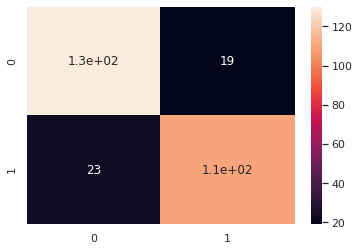

In [ ]:
print('\n----------------- ANÁLISE DO CONJUNTO DE TESTE ----------------------------\n')

test_y_pred = model.predict(test_x)
print(classification_report(test_y, test_y_pred))
acc_test = accuracy_score(test_y, test_y_pred)
#acc_std = np.std(acc_test)
#print('Acurácia no Conjunto de Teste: {:.4}%\n'.format(acc_test*100))
#print('Desvio Padrão do Conjunto de Teste: {:.8}\n'.format(acc_std))
cm=confusion_matrix(test_y, test_y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

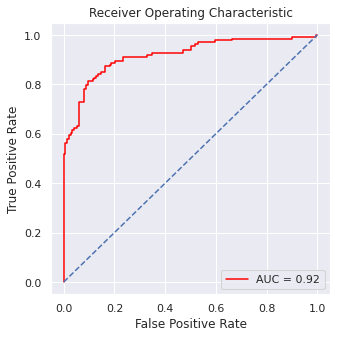

In [ ]:
#Curva_Roc
from sklearn.metrics import auc, roc_auc_score, roc_curve

def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


roc_auc = 0
y_proba=model.predict_proba(test_x)

false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

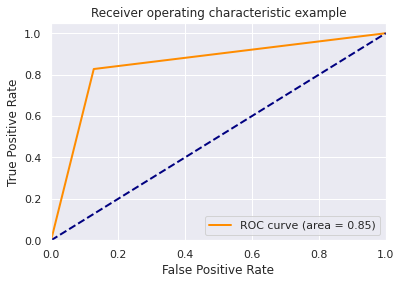

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_y, test_y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()